In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/messi_2.jpg')
img.shape #X,Y,RGB val dimension

(667, 1000, 3)

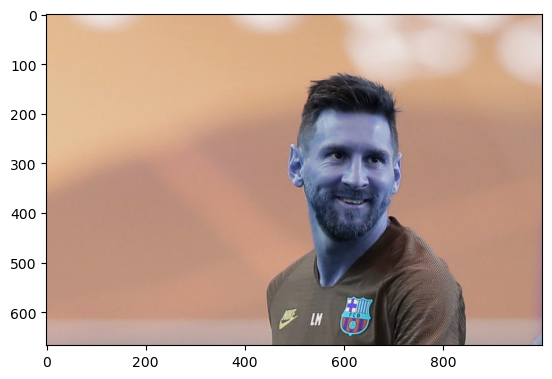

In [3]:
plt.imshow(img)

In [4]:
grayimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayimg.shape

(667, 1000)

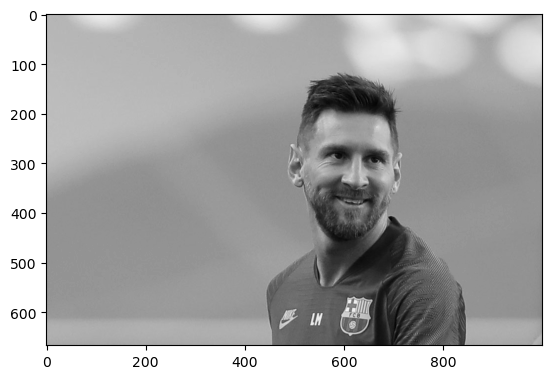

In [5]:
plt.imshow(grayimg,cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(grayimg, 1.3, 5)
faces #one array as one face - X,Y of starting point of face,w,h

array([[514, 203, 221, 221]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(514, 203, 221, 221)

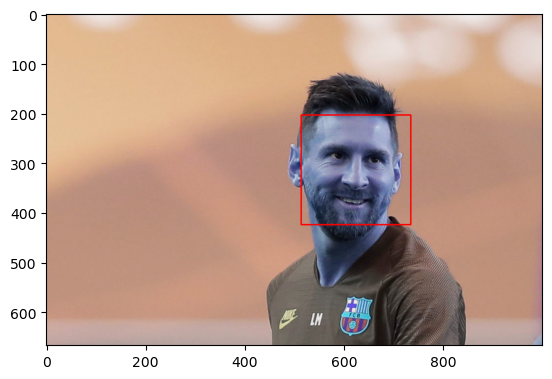

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

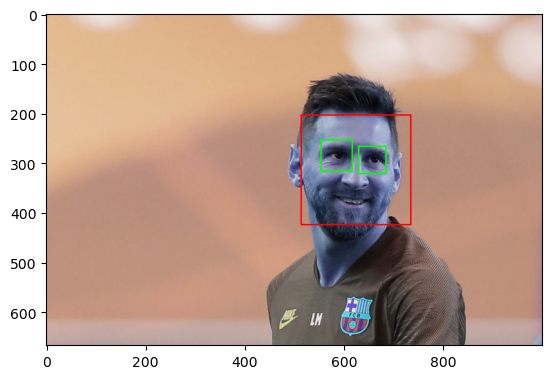

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = grayimg[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

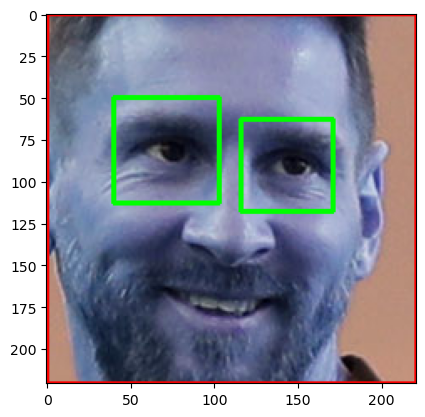

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
 def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

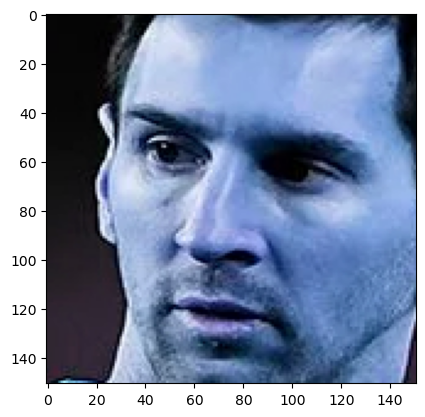

In [12]:
croppedimg = get_cropped_image_if_2_eyes('./test_images/messi_1.jpg')
plt.imshow(croppedimg)

In [13]:
#croppedimg = get_cropped_image_if_2_eyes('./test_images/martinez.jpg')
croppedimg #no result as two eyes not visible

array([[[ 6,  5,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [ 0,  2,  3],
        [ 0,  1,  2],
        [ 1,  3,  4]],

       [[ 6,  5,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [ 0,  2,  3],
        [ 0,  1,  2],
        [ 0,  2,  3]],

       [[ 6,  5,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [ 2,  1,  3],
        [ 0,  2,  3],
        [ 0,  4,  3]],

       ...,

       [[49, 34, 48],
        [45, 30, 44],
        [50, 33, 47],
        ...,
        [46, 44, 63],
        [51, 39, 57],
        [57, 41, 58]],

       [[50, 34, 51],
        [55, 45, 58],
        [52, 48, 60],
        ...,
        [36, 33, 49],
        [52, 42, 58],
        [54, 41, 55]],

       [[54, 43, 59],
        [35, 35, 47],
        [10, 19, 29],
        ...,
        [52, 45, 60],
        [52, 42, 55],
        [52, 42, 54]]], dtype=uint8)

In [14]:
path_to_data = "./dataset/"
path_to_cropped_data = "./dataset/cropped/"

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['./dataset/cropped',
 './dataset/kylian_mbappe',
 './dataset/lionel_messi',
 './dataset/lisandro_martinez',
 './dataset/manuel_neuer',
 './dataset/roy_keane']

In [17]:
#Creating a cropped images folder to store all cropped images in
import shutil
if os.path.exists(path_to_cropped_data):
     shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [18]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


Generating cropped images in folder:  ./dataset/cropped/kylian_mbappe
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lisandro_martinez
Generating cropped images in folder:  ./dataset/cropped/manuel_neuer
Generating cropped images in folder:  ./dataset/cropped/roy_keane


In [19]:
#Feature Engineering - Wavelet Transform

In [20]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

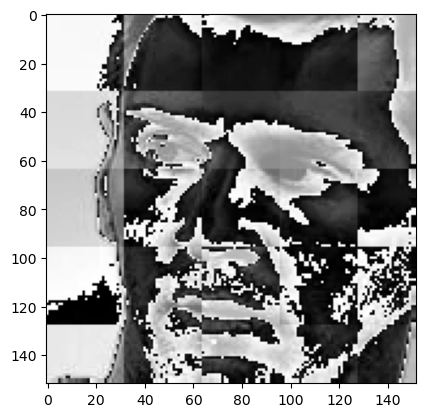

In [21]:
im_har = w2d(croppedimg,'db1',5)
plt.imshow(im_har, cmap='gray') #Gives facial clues for eyes,nose,lips etc

In [22]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'kylian_mbappe': ['./dataset/cropped/kylian_mbappe\\kylian_mbappe1.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe10.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe11.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe12.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe13.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe14.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe15.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe16.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe17.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe18.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe19.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe2.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe20.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe21.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe22.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe23.png',
  './dataset/cropped/kylian_mbappe\\kylian_mbappe24.png',

In [23]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count +=1
class_dict

{'kylian_mbappe': 0,
 'lionel_messi': 1,
 'lisandro_martinez': 2,
 'manuel_neuer': 3,
 'roy_keane': 4}

In [24]:
X = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        #Vertically stack each image with its corresponding wavelet transformed image using numpy
        img_combined = np.vstack((scaled_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1))) #raw scaled image has RGB thus multiply by 3
        X.append(img_combined)
        y.append(class_dict[celebrity_name])

In [25]:
len(X)

294

In [26]:
len(X[0]) #size of each image

4096

In [27]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(294, 4096)

In [28]:
X[0]

array([ 91.,  82.,  78., ..., 233., 232.,  17.])

In [29]:
#Model Training - Support Vector Machine

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8135593220338984

In [33]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.93      0.88      0.90        16
           2       1.00      0.50      0.67         8
           3       0.67      1.00      0.80        14
           4       0.85      0.79      0.81        14

    accuracy                           0.81        59
   macro avg       0.86      0.78      0.79        59
weighted avg       0.85      0.81      0.81        59



In [34]:
#Grid Search CV model

In [35]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [36]:
#Defining Candidate models - Different models being compared

In [37]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo,mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df #Accuracy scores for validation test (part of X_train and y_train not test data)

,model,best_score,best_params
0,svm,0.774468,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.540426,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.800000,{'logisticregression__C': 1}


In [39]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(X_test,y_test)

0.847457627118644

In [41]:
best_estimators['random_forest'].score(X_test,y_test)

0.6610169491525424

In [42]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8135593220338984

In [43]:
best_clf = best_estimators['svm']

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 5,  0,  0,  1,  1],
       [ 1, 13,  0,  2,  0],
       [ 1,  0,  4,  1,  2],
       [ 0,  0,  0, 14,  0],
       [ 0,  0,  0,  0, 14]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

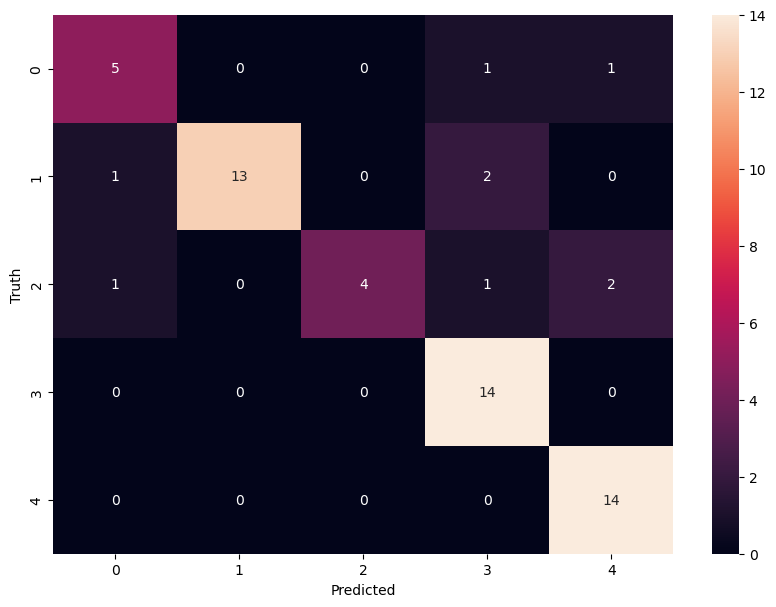

In [45]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
#Saving the trained model

In [47]:
!pip install joblib
import joblib
#Saving the model as a pickle in a file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [48]:
#Saving Class Dictionary

In [49]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))